## NOTES
This is simply a notebook with some example data that has been rescaled. It is not designed to reproduce the expected results from the paper.
The model itself is 150mb large and the dataset 140gb. So if you would like access please contact david.harvey@epfl.ch

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import glob
import darkCNN
import numpy as np
from matplotlib import pyplot as plt
import numpy as np

Get the training and test samples 

In [52]:
train, test = darkCNN.get_tf_DataSet(augment_data=True, simulationNames=['CDM','SIDM0.1','SIDM1'], 
                                                      channels=['total','stellar','xray'], 
                                                      allDataFile='../example/exampleCNN.pkl', resize=(100,100), train_split=0.01)



rescaling with nearestr


Plot some examples of the dataset

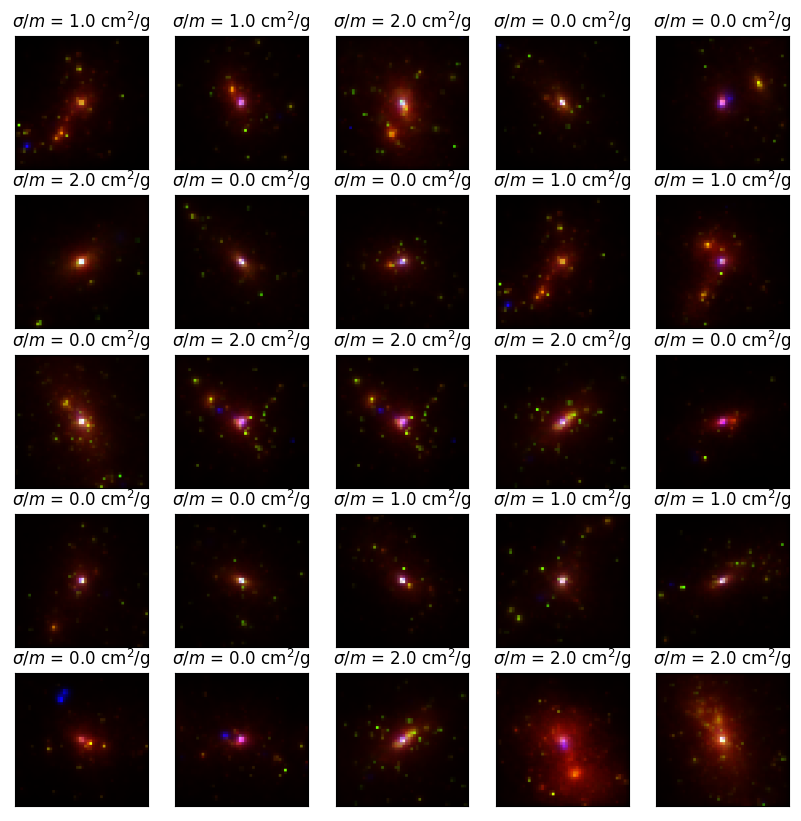

In [34]:
nClasses = len(np.unique(test[1]))
inputShape = test[0].shape[1:]
plt.figure(figsize=(10,10))
for j in range(25):
    i = np.random.randint(0, test[0].shape[0])
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
    plt.title(r"$\sigma/m$ = %s cm$^2$/g" % test[1][i])
plt.show()

Plot the predictions

The loss and accuracy for the training and test samples

In [49]:
model = darkCNN.tf.keras.models.load_model("../models/simple")

In [53]:
model.evaluate(test[0],test[1])

19/19 [==============================] - 0s 9ms/step - loss: 9.2261 - accuracy: 0.0118


[9.22606372833252, 0.011784511618316174]